In [12]:
import pandas as pd
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis
import numpy as np

In [3]:
prices_df = pd.read_csv('prices.csv',header=0)

In [4]:
prices_df

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [5]:
yahoo = prices_df[prices_df['symbol'] == 'YHOO']

yahoo_stk_prices = yahoo.close.values.astype('float32')
yahoo_stk_prices.shape

(1762,)

In [6]:
yahoo_stk_prices = yahoo_stk_prices.reshape(1762,1)
yahoo_stk_prices.shape

(1762, 1)

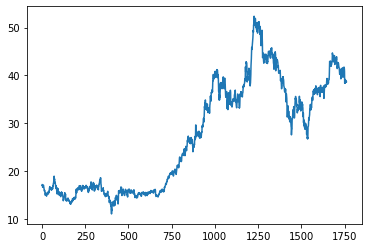

In [7]:
plt.plot(yahoo_stk_prices)
plt.show()

scaler = MinMaxScaler(feature_range=(0,1))
yahoo_stk_prices = scaler.fit_transform(yahoo_stk_prices)

In [8]:
yahoo_stk_prices

array([[0.14559111],
       [0.14874032],
       [0.14728683],
       ...,
       [0.66957366],
       [0.66739345],
       [0.66812015]], dtype=float32)

In [9]:
train_size = int(len(yahoo_stk_prices) * 0.80)

test_size = len(yahoo_stk_prices) - train_size

train, test = yahoo_stk_prices[0:train_size,:], yahoo_stk_prices[train_size:,:]

print(len(train), len(test))

1409 353


In [10]:
#convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        
    return np.array(dataX), np.array(dataY)

In [16]:
trainX, trainY = create_dataset(train)

testX, testY = create_dataset(test)

In [17]:
trainX[:5]

array([[0.14559111],
       [0.14874032],
       [0.14728683],
       [0.13590118],
       [0.13590118]], dtype=float32)

In [18]:
trainY[:5]

array([0.14874032, 0.14728683, 0.13590118, 0.13590118, 0.13687018],
      dtype=float32)

In [19]:
trainX.shape

(1407, 1)

In [20]:
trainY.shape

(1407,)

In [21]:
trainX = np.reshape(trainX, (trainX.shape[0],1, trainX.shape[1]))

testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [22]:
trainX.shape

(1407, 1, 1)

In [24]:
model = Sequential()

model.add(LSTM(100, input_dim=1, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation('linear'))

start = time.time()


model.compile(loss='mse', optimizer='rmsprop')

print('compilation time : ', time.time() - start)

compilation time :  0.009973764419555664


In [25]:
model.fit(trainX,trainY, batch_size=128, nb_epoch=10, validation_split=0.5)

Train on 703 samples, validate on 704 samples
Epoch 1/10
703/703 [==============================] - 3s 4ms/sample - loss: 0.0072 - val_loss: 0.2622
Epoch 2/10
703/703 [==============================] - 0s 261us/sample - loss: 0.0013 - val_loss: 0.2128
Epoch 3/10
703/703 [==============================] - 0s 77us/sample - loss: 6.2685e-04 - val_loss: 0.1985
Epoch 4/10
703/703 [==============================] - 0s 50us/sample - loss: 6.2467e-04 - val_loss: 0.1928
Epoch 5/10
703/703 [==============================] - 0s 52us/sample - loss: 5.9322e-04 - val_loss: 0.1826
Epoch 6/10
703/703 [==============================] - 0s 51us/sample - loss: 5.7567e-04 - val_loss: 0.1828
Epoch 7/10
703/703 [==============================] - 0s 50us/sample - loss: 5.6031e-04 - val_loss: 0.1758
Epoch 8/10
703/703 [==============================] - 0s 52us/sample - loss: 5.3135e-04 - val_loss: 0.1611
Epoch 9/10
703/703 [==============================] - 0s 50us/sample - loss: 5.2952e-04 - val_loss: 0.1448